In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


# Wilson-Cowan model

We modeled the firing rate of the neuronal population (not individual ones). We worked with two populations of neurons: excitatory and inhibitory. Where E is the firing rate of excitatory neurons, and I is the firing rate of inhibitory neurons. The model proposes: 

\begin{equation}
\frac{dE}{dt} = \dfrac{f\left( w_{EE}E+w_{IE}I+I_{E}\right) -E}{\tau_{E}}
\end{equation}

\begin{equation}
\frac{dI}{dt} = \dfrac{g\left( w_{EI}E+w_{II}I+I_{I}\right) -I}{\tau_{I}}
\end{equation}

Being 
\begin{aligned}
\cdot \\ f\left( x\right) =\begin{cases}
\dfrac{100x^{2}}{30^{2}+x^{2}} \quad \text{if}\quad x >0\\ 0 \quad \text{if}\quad x < 0
\end{cases}
\end{aligned}
and 

\begin{aligned}
\cdot \\ g\left( x\right) =\begin{cases}
\dfrac{100x^{2}}{20^{2}+x^{2}} \quad \text{if}\quad x >0\\ 0 \quad \text{if}\quad x < 0
\end{cases}
\end{aligned}


We first define the equations and the model



In [ ]:
#WC model
def WC(EI,t,params): 
  E,I = EI 
  wee,wie,I_e,tau_E,wei,wii,I_i,tau_I = params #Model Parameters 

  #Equations
  dEdt = (f(wee*E - wie*I + I_e) - E)/tau_E 
  dIdt = (g(wei*E - wii*I + I_i) - I)/tau_I 

  return dEdt,dIdt

#Additional Equations
def f(x):
  if x >= 0: res = 100*x**2/(30**2 + x**2)
  else: res = 0
  return res

def g(x):
  if x >= 0: res = 100*x**2/(20**2 + x**2)
  else: res = 0
  return res



In [ ]:
#Now the initial conditions and integration using odeint 
t = np.linspace(0,300,1000)   #Integration time
E_0,I_0 = 40,5                 #Initial conditions
params = 1.5,1,20,5,1,0,0,10  #parameters

X0 = E_0,I_0
E_t,I_t = odeint(WC,X0,t,args = (params,)).T #E_t e I_t contain the temporal evolution of the firing rates of the E's and I's populations 

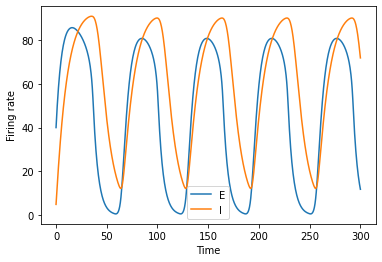

In [ ]:
#We can do some graphics!!
plt.figure()
plt.plot(t,E_t,label = "E")
plt.plot(t,I_t,label = "I")
plt.ylabel("Firing rate")
plt.xlabel("Time")
plt.legend()

Now that we have the firing rates of the populations, we can ask - what is the probability that one neuron fires? In this model is assumed that one neuron at time k fires with a probability 

\begin{equation}
P_{k}=\begin{cases}\dfrac{\left( E_{n}+E_{k+1}\right) \Delta t}{2\times 1000}\\ \dfrac{\left( I_{x}+I_{k + 1}\right) }{2\times 1000}\Delta t\end{cases}
\end{equation}
where it depends if it is an excitatoy or inhibitory neuron the case that we will consider 

In [ ]:
#We define the firing probability 
def prob_fire(X1,X2): #delta t = 1
  return 1/1000*(X1 + X2)/2

#We determine if the neurons fire or not. We give it a random number, and if the number is less than the prob_fire, then the neuron fires.
neurons_E_index = [[1 if np.random.random() < prob_fire(E_t[j],E_t[j+1]) else 0 for j in range(len(E_t)-1)] for i in range(101)]
neurons_I_index = [[3 if np.random.random() < prob_fire(I_t[j],I_t[j+1]) else 0 for j in range(len(I_t)-1)] for i in range(20)]

neurons_index = np.vstack([neurons_E_index,neurons_I_index])

Text(0.5, 0, 'Time')

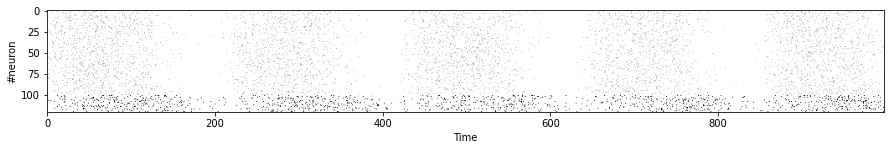

In [ ]:
#Graphs
plt.figure(figsize=(15,10))
plt.imshow(neurons_index,cmap = "binary")
plt.ylabel("#neuron")
plt.xlabel("Time")